In [1]:
import numpy as np
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

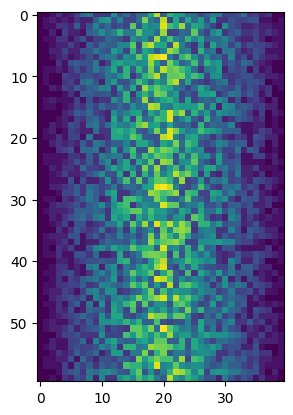

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
image = plt.imshow(data)
plt.show()

In [6]:
data

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

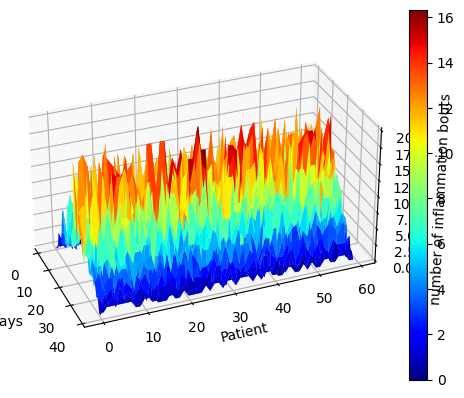

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


# create x, y coordinate arrays
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# create a colormap
cmap = plt.get_cmap('coolwarm')

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, data, cmap=cmap)

# set axis labels
ax.set_xlabel('days')
ax.set_ylabel('Patient')
ax.set_zlabel('number of inflammation bouts')



# set colorbar
fig.colorbar(ax.plot_surface(X, Y, data, cmap='jet'))

# set y-axis scaling
ax.set_box_aspect([1, 2, 1])

# set initial view
ax.view_init(elev=30, azim=-20)

# create a function to update the view
def update_view(frame):
    ax.view_init(elev=30, azim=-20+frame)
    return surface,

# create the animation
animation = FuncAnimation(fig, update_view, frames=range(0, 360, 2), interval=50)

# save the animation
animation.save('animation.mp4')

# show the plot
plt.show()